In [8]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [9]:
#Read input file and understand the data
# "default" is my dependent variable

In [34]:
import pandas as pd
import numpy as np
gc=pd.read_csv('C:/PGP-AIML/R4_Residency/R4_Lab_External/german_credit.csv')
gc.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [35]:
# Print Shape of model data
df=pd.get_dummies(gc, columns=['account_check_status','credit_history','purpose','savings','present_emp_since',
'personal_status_sex','other_debtors','property','other_installment_plans','housing',
'job','telephone','foreign_worker'],drop_first=True)
df.head()
df.shape

(1000, 49)

### Check for highly correlated variables but don't required any treatment for this use case

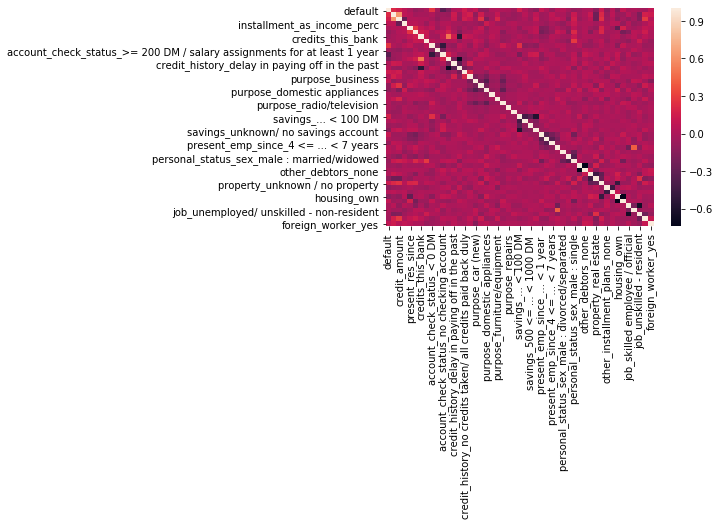

In [36]:
sns.heatmap(df.corr())

### Drop the original variables which are converted to dummy

In [38]:
df.drop(['account_check_status','credit_history','purpose','savings','present_emp_since',
'personal_status_sex','other_debtors','property','other_installment_plans','housing',
'job','telephone','foreign_worker'],inplace=True,axis=1)
print(df.head(10))

   default  duration_in_month  credit_amount  installment_as_income_perc  \
0        0                  6           1169                           4   
1        1                 48           5951                           2   
2        0                 12           2096                           2   
3        0                 42           7882                           2   
4        1                 24           4870                           3   
5        0                 36           9055                           2   
6        0                 24           2835                           3   
7        0                 36           6948                           2   
8        0                 12           3059                           2   
9        1                 30           5234                           4   

   present_res_since  age  credits_this_bank  people_under_maintenance  \
0                  4   67                  2                         1   
1              

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [39]:
x=df.drop('default',axis=1)
y=df['default']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)
print("x_train")
print(x_train.count())
print("x_test")
print(x_test.count())
print("y_Train")
print(y_train.count())
print("y_Test")
print(y_test.count())

x_train
duration_in_month                                                             700
credit_amount                                                                 700
installment_as_income_perc                                                    700
present_res_since                                                             700
age                                                                           700
credits_this_bank                                                             700
people_under_maintenance                                                      700
account_check_status_< 0 DM                                                   700
account_check_status_>= 200 DM / salary assignments for at least 1 year       700
account_check_status_no checking account                                      700
credit_history_critical account/ other credits existing (not at this bank)    700
credit_history_delay in paying off in the past                                700
credit_h

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [40]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,classification_report, confusion_matrix,accuracy_score
clf=RandomForestClassifier( n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [41]:
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)
clf.fit(x_train_scaled, y_train)
y_predict = clf.predict(x_test_scaled)
#model_score = clf.score(x_test_scaled, y_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.accuracy_score(y_test, y_predict))

[[199  15]
 [ 58  28]]
0.7566666666666667


### Q6 Show the list of the features importance( 1 Marks)

In [42]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print (feature_importances)

                                                    importance
credit_amount                                         0.116350
age                                                   0.090328
duration_in_month                                     0.086042
account_check_status_no checking account              0.049934
installment_as_income_perc                            0.043242
present_res_since                                     0.038028
account_check_status_< 0 DM                           0.033826
credit_history_critical account/ other credits ...    0.031238
other_installment_plans_none                          0.023453
savings_... < 100 DM                                  0.022067
credits_this_bank                                     0.021543
personal_status_sex_male : single                     0.020685
telephone_yes, registered under the customers n...    0.020497
job_skilled employee / official                       0.019347
purpose_car (new)                                     0

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict

In [32]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

CLF: 0.767000 (0.057105)


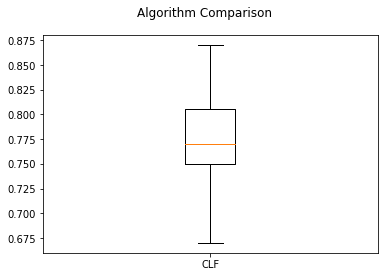

In [47]:
import matplotlib.pyplot as plt
from sklearn import model_selection
models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('CLF', RandomForestClassifier( n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=77)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
#Calculate Mean score

In [48]:
cv_results.mean()

0.767

In [0]:
# Calculate score standard deviation using std()

In [49]:
cv_results.std()

0.057105166141076934

# Q8 Print the confusion matrix( 1 Marks)

In [55]:
kfold_predict=cross_val_predict(clf,x,y,cv=kfold)
print(metrics.confusion_matrix(y, kfold_predict))

[[649  51]
 [182 118]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
